In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import paired_distances
from sklearn.preprocessing import StandardScaler
import csv
from sklearn.model_selection import GridSearchCV
from sklearn.metrics._scorer import make_scorer
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from scipy.stats import zscore


In [42]:
df = pd.read_csv('development.csv', sep=',')

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif
noise_pmax = []
noise_negpmax = []
noise_area = []#4.7
noise_tmax = []
noise_rms = []
noise_vpp = []
noise_slewrate = []
pmax = [f'pmax[{i}]' for i in range(18)]
negpmax = [f'negpmax[{i}]' for i in range(18)]
#for i in range(0,18):
#    condition = abs(df[f"tmax[{i}]"]) > 1e-6
#    df[f"slewrate[{i}]"] = np.where(condition, ((df[f"pmax[{i}]"] - df[f"negpmax[{i}]"])) / df[f"tmax[{i}]"],  np.finfo(np.float32).max)
df = df[df['negpmax[1]'] < 0]
df = df[df['negpmax[2]'] < 0]
df = df[df['negpmax[3]'] < 0]
df = df[df['negpmax[4]'] < 0]
df = df[df['negpmax[5]'] < 0]
df = df[df['negpmax[6]'] < 0]
df = df[df['negpmax[8]'] < 0]
df = df[df['negpmax[9]'] < 0]
df = df[df['negpmax[10]'] < 0]
df = df[df['negpmax[11]'] < 0]
df = df[df['negpmax[13]'] < 0]
df = df[df['negpmax[14]'] < 0]
df = df[df['negpmax[15]'] < 0]
#df = df[df[negpmax] < 0]
for i in range(0,18):
    df[f"vpp[{i}]"] = (df[f"pmax[{i}]"] - df[f"negpmax[{i}]"])
#for i in range(0,18):
#    df[f"widh[{i}]"] = df[f"area[{i}]"]/((df[f"pmax[{i}]"]-df[f"negpmax[{i}]"])/2)
#for i in range(0,18):
#   df[f"widhRMS[{i}]"] = df[f"rms[{i}]"]/((df[f"pmax[{i}]"]-df[f"negpmax[{i}]"])/2)
for i in [0, 7, 12, 16, 17]: 
    noise_pmax.append(f'pmax[{i}]')
    noise_area.append(f'area[{i}]')
    noise_area.append(f'negpmax[{i}]')
    noise_vpp.append(f'vpp[{i}]')
    #noise_vpp.append(f'slewrate[{i}]')
    #noise_negpmax.append(f'widh[{i}]')
    #noise_slewrate.append(f'slewrate[{i}]')
    #noise_slewrate.append(f'widh[{i}]')


#noise_area.append('area[15]')
#noise_area.append('negpmax[15]')

for i in range(0, 18): 
    noise_rms.append(f'rms[{i}]')
    noise_tmax.append(f'tmax[{i}]')
    #noise_negpmax.append(f'negpmax[{i}]')
    #noise_area.append(f'area[{i}]')
noise = noise_pmax + noise_negpmax + noise_area + noise_tmax + noise_rms+ noise_vpp + noise_slewrate
df.drop(columns=noise, inplace=True)

In [44]:
df_eval = pd.read_csv('evaluation.csv', sep=',')#4.76 con -neg
#for i in range(0,18):
#    condition = abs(df_eval[f"tmax[{i}]"]) > 1e-6
#    df_eval[f"slewrate[{i}]"] = np.where(condition, ((df_eval[f"pmax[{i}]"] - df_eval[f"negpmax[{i}]"])) / df_eval[f"tmax[{i}]"], np.finfo(np.float32).max)
for i in range(0,18):
    df_eval[f"vpp[{i}]"] = (df_eval[f"pmax[{i}]"] - df_eval[f"negpmax[{i}]"])
#for i in range(0,18):
#    df_eval[f"widh[{i}]"] = df_eval[f"area[{i}]"]/((df_eval[f"pmax[{i}]"]-df_eval[f"negpmax[{i}]"])/2)
#for i in range(0,18):
#    df_eval[f"widhRMS[{i}]"] = df_eval[f"rms[{i}]"]/((df_eval[f"pmax[{i}]"]-df_eval[f"negpmax[{i}]"])/2)
df_eval.drop(columns=noise, inplace=True)

X_train = df.drop(columns=['x', 'y']).values
y_trainX = df[['x']].values
y_trainY = df[['y']].values
y_train = df[['x','y']].values
X_test = df_eval.drop(columns='Id').values

In [45]:
reg = RandomForestRegressor(n_estimators = 200, criterion='squared_error', max_features=8, random_state=42, n_jobs=-1)
reg.fit(X_train, y_train)                    
y_pred = reg.predict(X_test) 
header = ['Id', 'Predicted']
with open("submission.csv", 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i in df_eval['Id']:
         writer.writerow([i, ''.join((str(round(y_pred[i, 0],2)), '|', str(round(y_pred[i, 1],2))))])  

#437115a620542940c0033cbb7166e7904d54c5530eb348600fcdf500de4258ca


In [46]:
#reg = RandomForestRegressor(n_estimators = 200, criterion='squared_error', max_features='sqrt', random_state=42, n_jobs=-1)
#reg.fit(X_train, y_trainX.ravel())                    
#y_predX = reg.predict(X_test)   
#reg = RandomForestRegressor(n_estimators = 200, criterion='squared_error', max_features='sqrt', random_state=42, n_jobs=-1)    
#reg.fit(X_train, y_trainY.ravel())                    
#y_predY = reg.predict(X_test)              

In [47]:
#header = ['Id', 'Predicted']
#with open("submission.csv", 'w', newline='') as f:
#    writer = csv.writer(f)
#    writer.writerow(header)
#    for i in df_eval['Id']:
#        writer.writerow([i, ''.join((str(round(y_predX[i],2)), '|', str(round(y_predY[i],2))))]) 

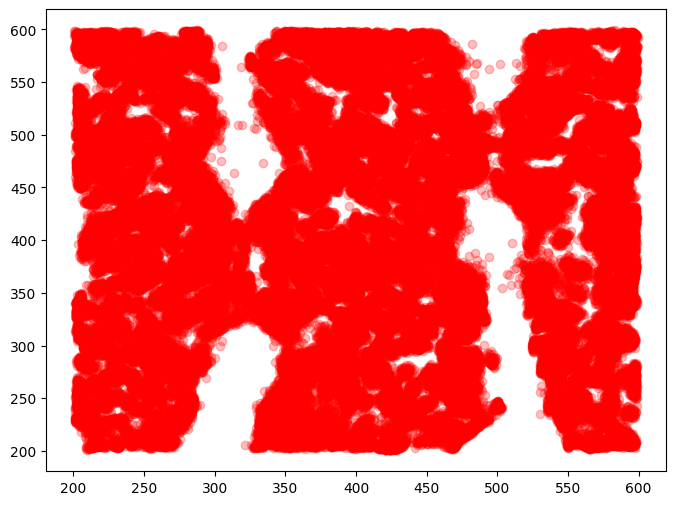

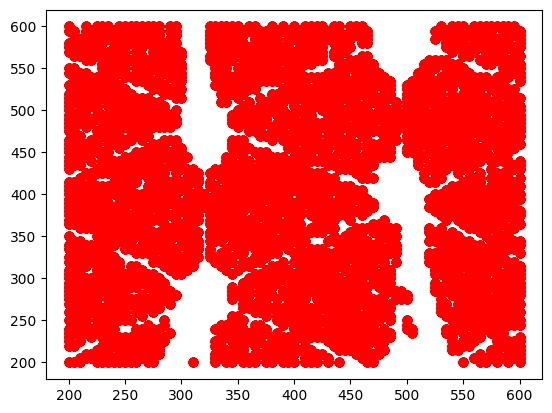

In [48]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(y_pred[:,0], y_pred[:,1], c='r', marker='o', alpha=0.25)
plt.show()
plt.scatter(y_train[:,0], y_train[:,1], c='r', marker='o', alpha=0.25)
# Aggiungi etichette agli as

# Mostra il plot
plt.show()